# Stock Market Data Visualization with Pandas

## Introduction

This notebook demonstrates various ways to visualize stock market data using pandas built-in plotting capabilities. We'll analyze stock price data and trading volumes for different companies, creating histograms, area plots, line charts, and scatter plots.

## Data Loading and Preparation

First, we'll load our stock market data from a CSV file and convert date strings to datetime objects.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("stocks.csv")
df["Date"] = pd.to_datetime(df["Date"])
tickers = df["Ticker"].unique()
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


## Volume Distribution Histogram

This visualization shows the distribution of trading volumes for each company. Using pandas' built-in plotting function with the `hist` kind parameter, we create histograms with different colors for each company, allowing us to compare their trading volume patterns.

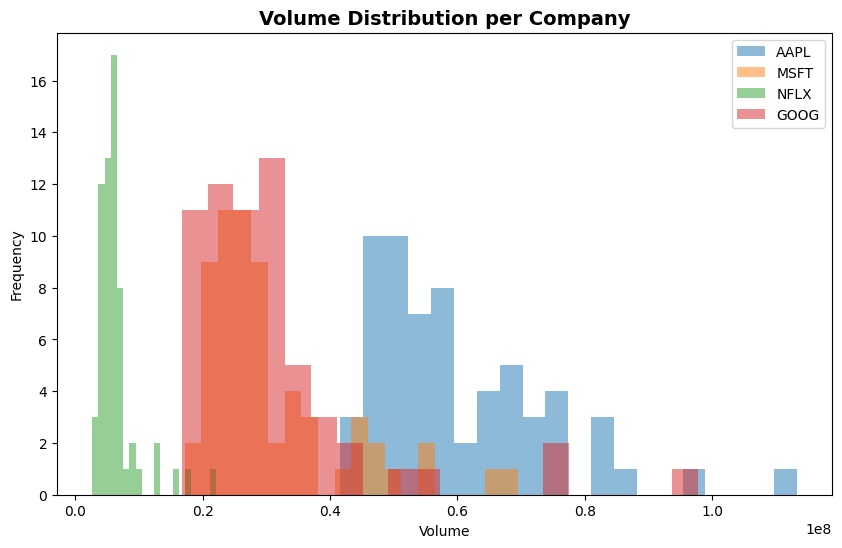

In [2]:
# Create a histogram using pandas plot
plt.figure(figsize=(10, 6))
for ticker in tickers:
    cmp_df = df[df["Ticker"] == ticker]
    cmp_df["Volume"].plot(kind="hist", bins=20, alpha=0.5, label=ticker)
plt.title("Volume Distribution per Company", fontsize=14, fontweight='bold')
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("Histogram_Volume_Distribution_PandasOnly.png")
plt.show()

## Cumulative Close Prices Over Time

This area plot visualizes how the closing prices accumulate over time for each company. We first group the data by date and ticker, then unstack to create a DataFrame with dates as the index and companies as columns. We then use pandas' built-in area plot method to create a stacked area chart.

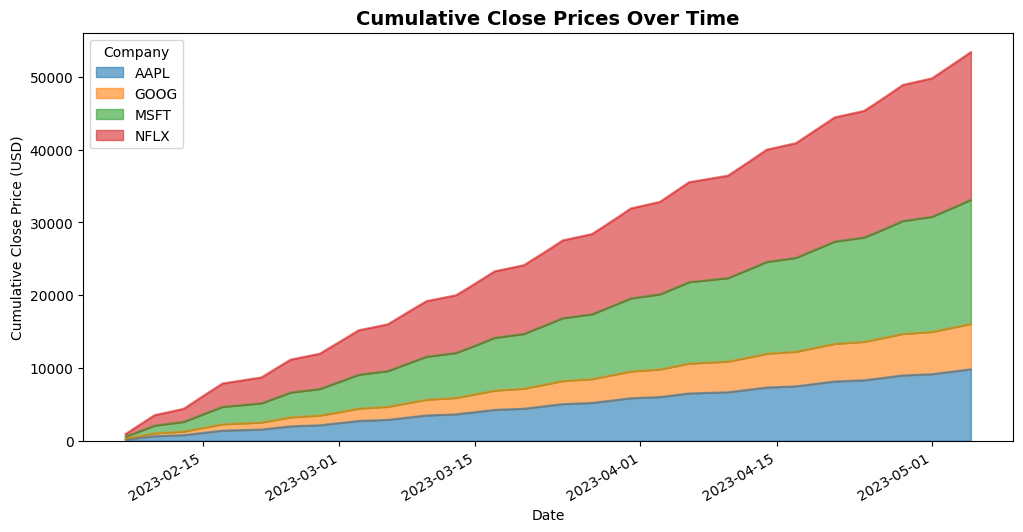

In [3]:
# Prepare data for area plot
cumulative_close = df.groupby(['Date', 'Ticker'])['Close'].sum().unstack()
cumulative_close.fillna(0, inplace=True)
cumulative_close = cumulative_close.cumsum()

plt.figure(figsize=(12, 6))
cumulative_close.plot.area(ax=plt.gca(), alpha=0.6)
plt.title("Cumulative Close Prices Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Cumulative Close Price (USD)")
plt.legend(title='Company')
plt.savefig("Area_Cumulative_Close_PandasOnly.png")
plt.show()

## Volume vs Adjusted Close Price Relationship

This scatter plot shows the relationship between trading volume and adjusted closing price for each company. Using pandas' built-in scatter plot functionality, we can visualize if there's any correlation between trading activity and price levels.

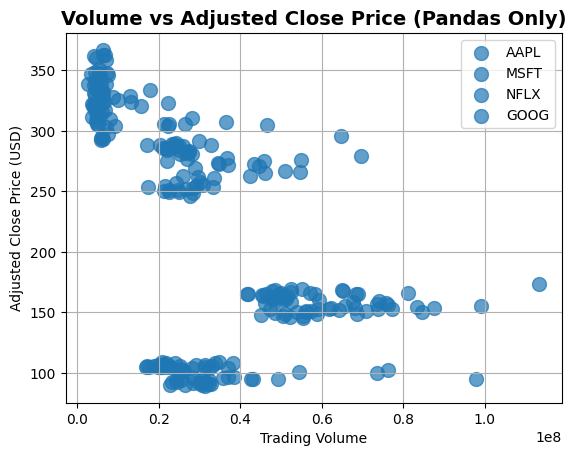

In [5]:
#  Volume vs Adjusted Close
ax = None
for ticker in df['Ticker'].unique():
    company_df = df[df['Ticker'] == ticker]
    ax = company_df.plot(
        kind='scatter',
        x='Volume',
        y='Adj Close',
        label=ticker,
        s=100,
        alpha=0.7,
        ax=ax  
    )
plt.title("Volume vs Adjusted Close Price (Pandas Only)", fontsize=14, fontweight='bold')
plt.xlabel("Trading Volume")
plt.ylabel("Adjusted Close Price (USD)")
plt.grid(True)
plt.savefig("Volume_vs_AdjClose_PandasOnly.png")
plt.show()

## Daily Price Range Over Time

This visualization shows the daily price range (High price - Low price) for each company over time. The price range is an indicator of daily volatility. We create the visualization with a combination of line plots and filled areas to highlight the magnitude of price movements.

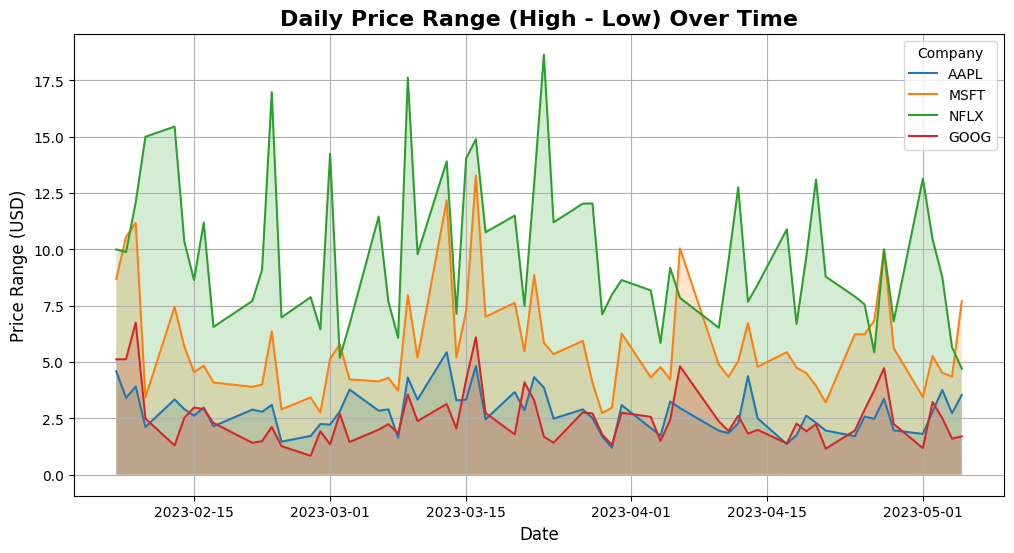

In [7]:
# Create a new column for Daily Price Range
df['Daily_Range'] = df['High'] - df['Low']

plt.figure(figsize=(12, 6))
for company in df['Ticker'].unique():
    company_data = df[df['Ticker'] == company]
    plt.plot(company_data['Date'], company_data['Daily_Range'], label=company)
    plt.fill_between(company_data['Date'], company_data['Daily_Range'], alpha=0.2)
plt.title("Daily Price Range (High - Low) Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price Range (USD)", fontsize=12)
plt.legend(title='Company')
plt.grid(True)
plt.savefig("Daily_Price_Range_PandasOnly.png")
plt.show()

## Conclusion

In this notebook, we've demonstrated how to create various visualizations using pandas' built-in plotting capabilities. These visualizations help us analyze stock market data from different perspectives:

1. **Volume Distribution**: Understanding the distribution of trading volumes across companies
2. **Cumulative Prices**: Visualizing how closing prices accumulate over time
3. **Price Range/Volatility**: Analyzing the daily price volatility for each company
4. **Volume-Price Relationship**: Exploring potential correlations between trading volume and price

Pandas' plotting functionality provides a convenient way to create these visualizations with minimal code, leveraging the DataFrame structure to organize and manipulate the data efficiently.